In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

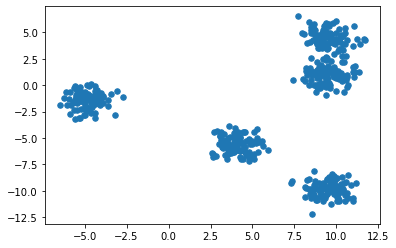

In [2]:
#Aquí creamos datos sintéticos para observar en un plot sus muestras y sus
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=.8, random_state=4)
plt.scatter(X[:, 0], X[:, 1], s=30);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_kmeans)

0.4

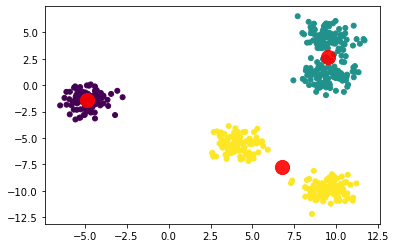

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9);

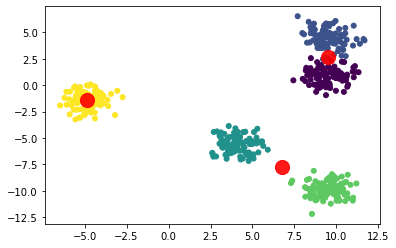

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=25, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9);

In [7]:
model = KMeans(n_clusters=3)
model.fit(X)
predictedY = model.predict(X)

In [8]:
# model.labels_

In [17]:
accuracy_score(y_kmeans, predictedY)

0.4

In [10]:
#Base de datos de IRIS
iris = datasets.load_iris()
iris.data
iris.target
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [11]:
pd.DataFrame(iris.data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
pd.DataFrame(iris.data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
model = KMeans(n_clusters=3)
model.fit(x)
# The fudge to reorder the cluster ids.
pre = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
round(accuracy_score(y['Target'], pre), 4) * 100

89.33